# 나머지 뭉탱이

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import csv

In [2]:
import os
from matplotlib import font_manager as fm

font_file = "../폰트 파일/NanumGothic.ttf"
fm.fontManager.addfont(font_file)

if os.name == 'posix':
    # plt.rcParams['font.family'] = 'NanumGothic'
    plt.rc('font', family='NanumGothic')
elif os.name == 'nt': 
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False)
# plt.rcParams['axes.unicode_minus'] = False

%config InlineBackend.figure_format = 'retina'

In [3]:
with open("../참고 데이터/한국행정구역분류_행정동코드(서울).csv", encoding='cp949') as f:
    data1 = pd.read_csv(f)
    newdata = data1[['소분류', '읍면동']]
newdata

,소분류,읍면동
0,1101053,사직동
1,1101054,삼청동
2,1101055,부암동
3,1101056,평창동
4,1101057,무악동
...,...,...
410,1125070,둔촌1동
411,1125071,둔촌2동
412,1125072,암사1동
413,1125073,천호2동


# 2020년

## 2020년 5월 : 생활 방역 전환

9452522
도착 시군구 코드
강남구     19942924.68
강동구      6457857.92
강북구      6081838.78
강서구      7684660.58
관악구      8398191.89
광진구      7685267.88
구로구      6720294.43
금천구      3728523.41
노원구      7794598.91
도봉구      5353244.10
동대문구     7970098.06
동작구      8279250.71
마포구     10743761.73
서대문구     8722748.94
서초구     14677805.67
성동구      8329461.96
성북구      8894294.38
송파구     11577906.40
양천구      6818402.21
영등포구    11367385.97
용산구      7367993.99
은평구      5870030.12
종로구     11016862.69
중구      11591554.82
중랑구      5802785.69
Name: 이동인구(합), dtype: float64


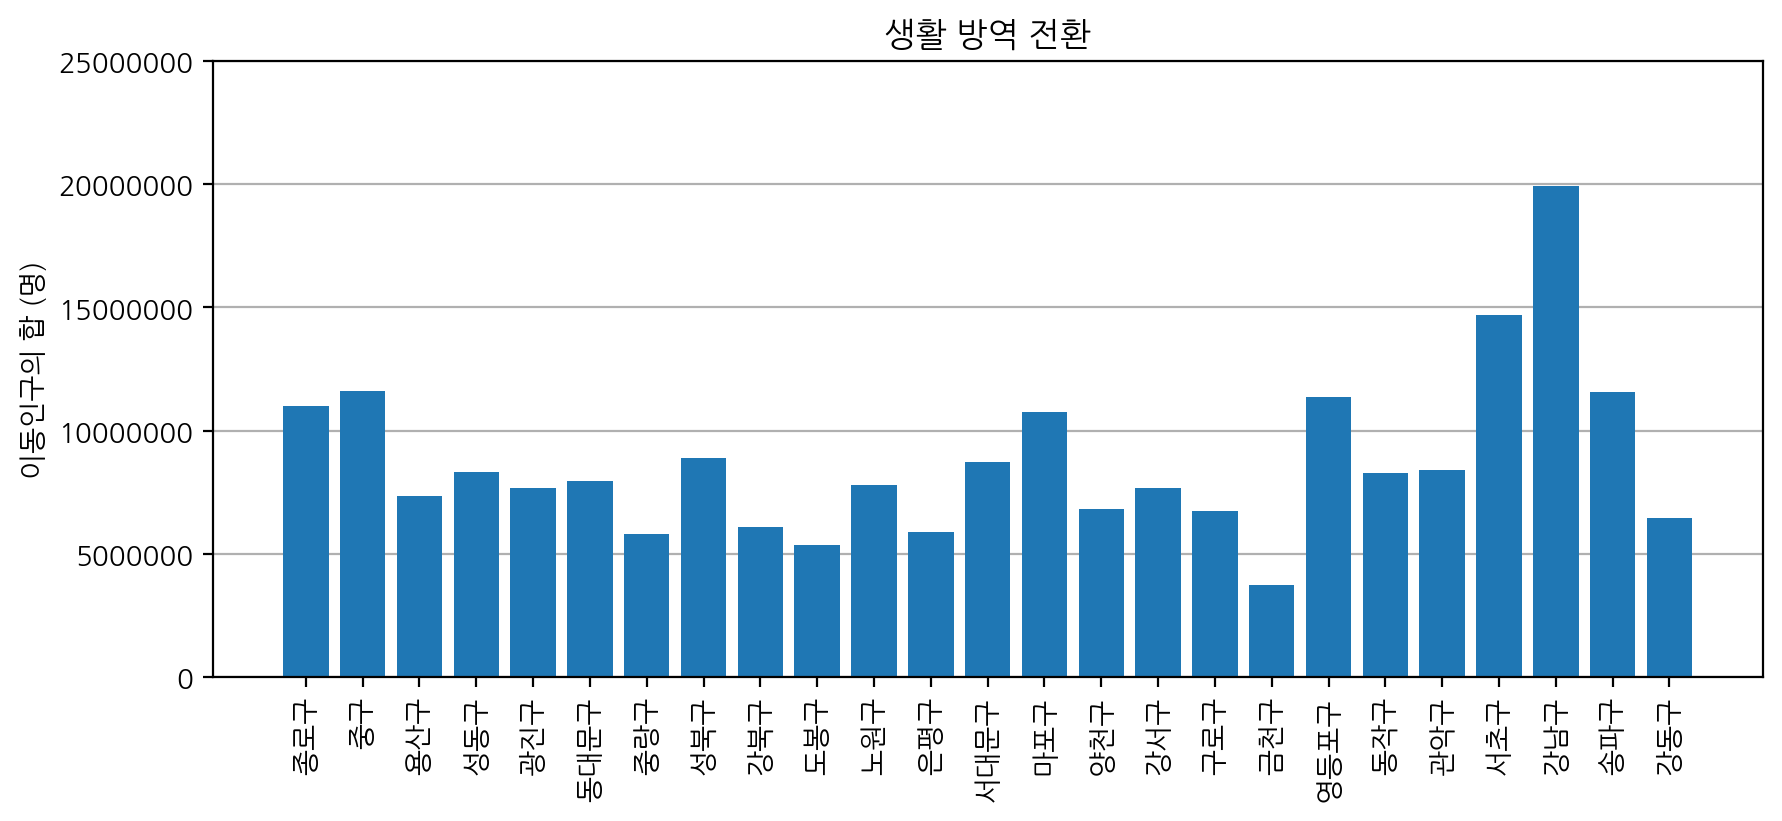

In [5]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202005/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202005/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = ['종로구', '중구', '용산구','성동구','광진구','동대문구','중랑구',
 '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구',
    '마포구', '양천구', '강서구', '구로구', '금천구','영등포구','동작구',
    '관악구','서초구','강남구','송파구','강동구']
y = [d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구,  d.도봉구 ,
d.노원구,  d.은평구,  d.서대문구, d.마포구, d.양천구,  d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구, d.관악구,
d.서초구, d.강남구, d.송파구, d.강동구 ]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10,4)
ax.grid(axis='y')
ax.bar(x,y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25),x,rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain',axis='y')
ax.set_title("생활 방역 전환")
ax.set_axisbelow(True)
fig.savefig('./메로나png/2.생활방역 전환.png', bbox_inches='tight')
fig.show()

## 2020년 9월 : 2.5단계 강화

8947536
도착 시군구 코드
강남구     17498530.22
강동구      5714680.85
강북구      5415502.03
강서구      6982999.58
관악구      7522546.41
광진구      6743537.45
구로구      6063188.72
금천구      3454507.93
노원구      6998116.28
도봉구      4852461.75
동대문구     7312900.49
동작구      7162016.03
마포구      9566610.31
서대문구     7537139.61
서초구     12612650.84
성동구      7599628.77
성북구      7893083.08
송파구     10190712.86
양천구      6037582.71
영등포구    10144620.54
용산구      6691978.14
은평구      5359429.32
종로구      9470514.22
중구      10278025.36
중랑구      5334457.70
Name: 이동인구(합), dtype: float64


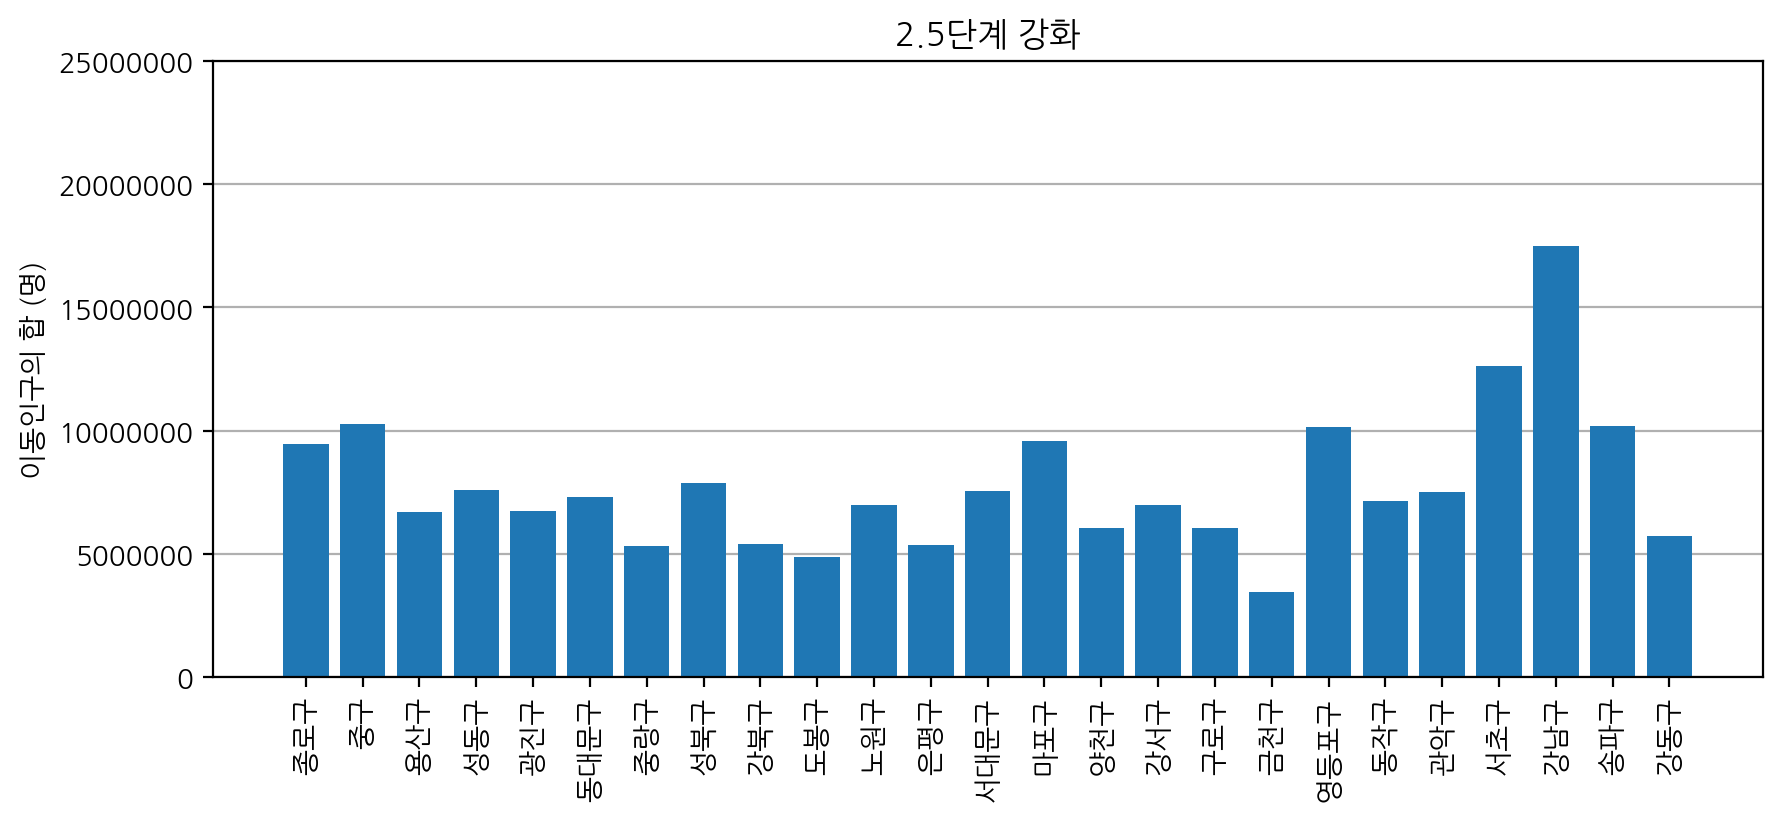

In [6]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202009/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202009/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = ['종로구', '중구', '용산구','성동구','광진구','동대문구','중랑구',
 '성북구', '강북구', '도봉구', '노원구', '은평구', '서대문구',
    '마포구', '양천구', '강서구', '구로구', '금천구','영등포구','동작구',
    '관악구','서초구','강남구','송파구','강동구']
y = [d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구,  d.도봉구 ,
d.노원구,  d.은평구,  d.서대문구, d.마포구, d.양천구,  d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구, d.관악구,
d.서초구, d.강남구, d.송파구, d.강동구 ]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10,4)
ax.grid(axis='y')
ax.bar(x,y)
ax.set_ylim(0, 25000000)
ax.set_xticks(range(25),x,rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain',axis='y')
ax.set_title("2.5단계 강화")
ax.set_axisbelow(True)
fig.savefig('./메로나png/4. 2.5단계 강화.png', bbox_inches='tight')
fig.show()

## 2020년 10월 : 1단계 하향

9509411
도착 시군구 코드
강남구     20658648.23
강동구      6674556.43
강북구      6358111.28
강서구      8124663.24
관악구      8742517.98
광진구      7983112.05
구로구      7017691.72
금천구      3905966.10
노원구      8191635.01
도봉구      5556133.89
동대문구     8389154.81
동작구      8426189.06
마포구     11393771.09
서대문구     9033981.24
서초구     14927723.55
성동구      8730727.24
성북구      9267381.25
송파구     12012379.80
양천구      7093090.23
영등포구    11740498.95
용산구      7958844.90
은평구      6206015.41
종로구     11825396.56
중구      12203076.61
중랑구      6077640.75
Name: 이동인구(합), dtype: float64


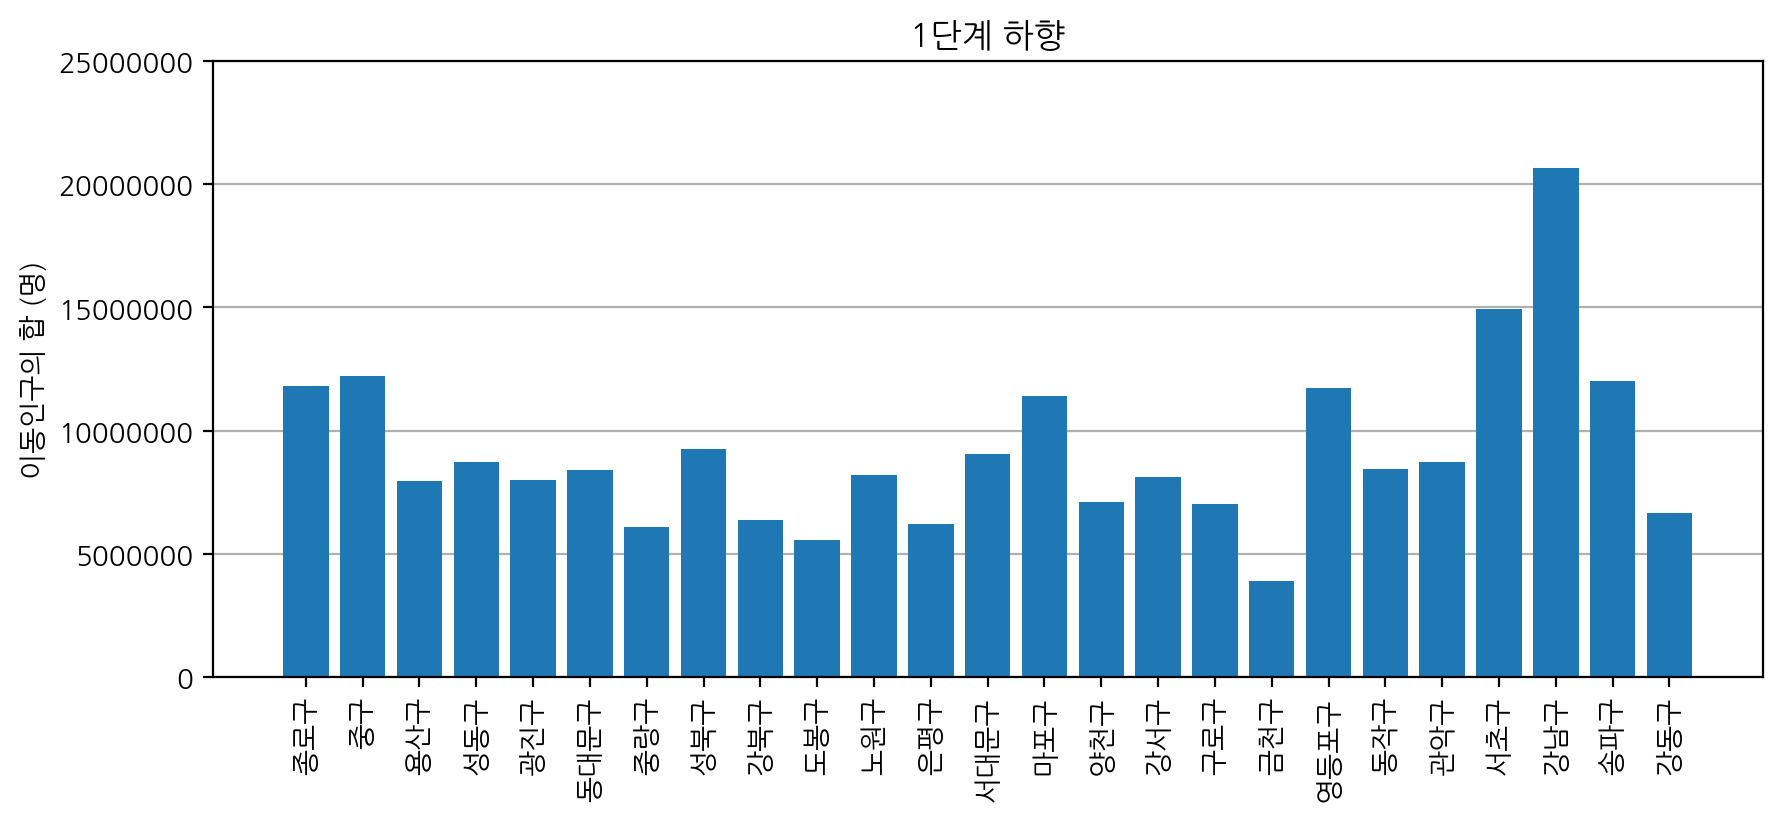

In [7]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202010/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202010/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("1단계 하향")
ax.set_axisbelow(True)
fig.savefig('./메로나png/5. 1단계 하향.png', bbox_inches='tight')
fig.show()

## 2020년 11월 : 정밀방역으로 세분화

9343238
도착 시군구 코드
강남구     19981203.33
강동구      6311258.99
강북구      5905661.73
강서구      7716098.64
관악구      8272123.98
광진구      7413323.07
구로구      6700261.83
금천구      3739654.39
노원구      7684677.85
도봉구      5174318.59
동대문구     7851580.28
동작구      7937256.76
마포구     10481406.72
서대문구     8511905.92
서초구     14363970.22
성동구      8234159.80
성북구      8687212.26
송파구     11408356.80
양천구      6641759.50
영등포구    11137770.51
용산구      7402071.37
은평구      5767999.38
종로구     11051613.73
중구      11718236.62
중랑구      5707109.01
Name: 이동인구(합), dtype: float64


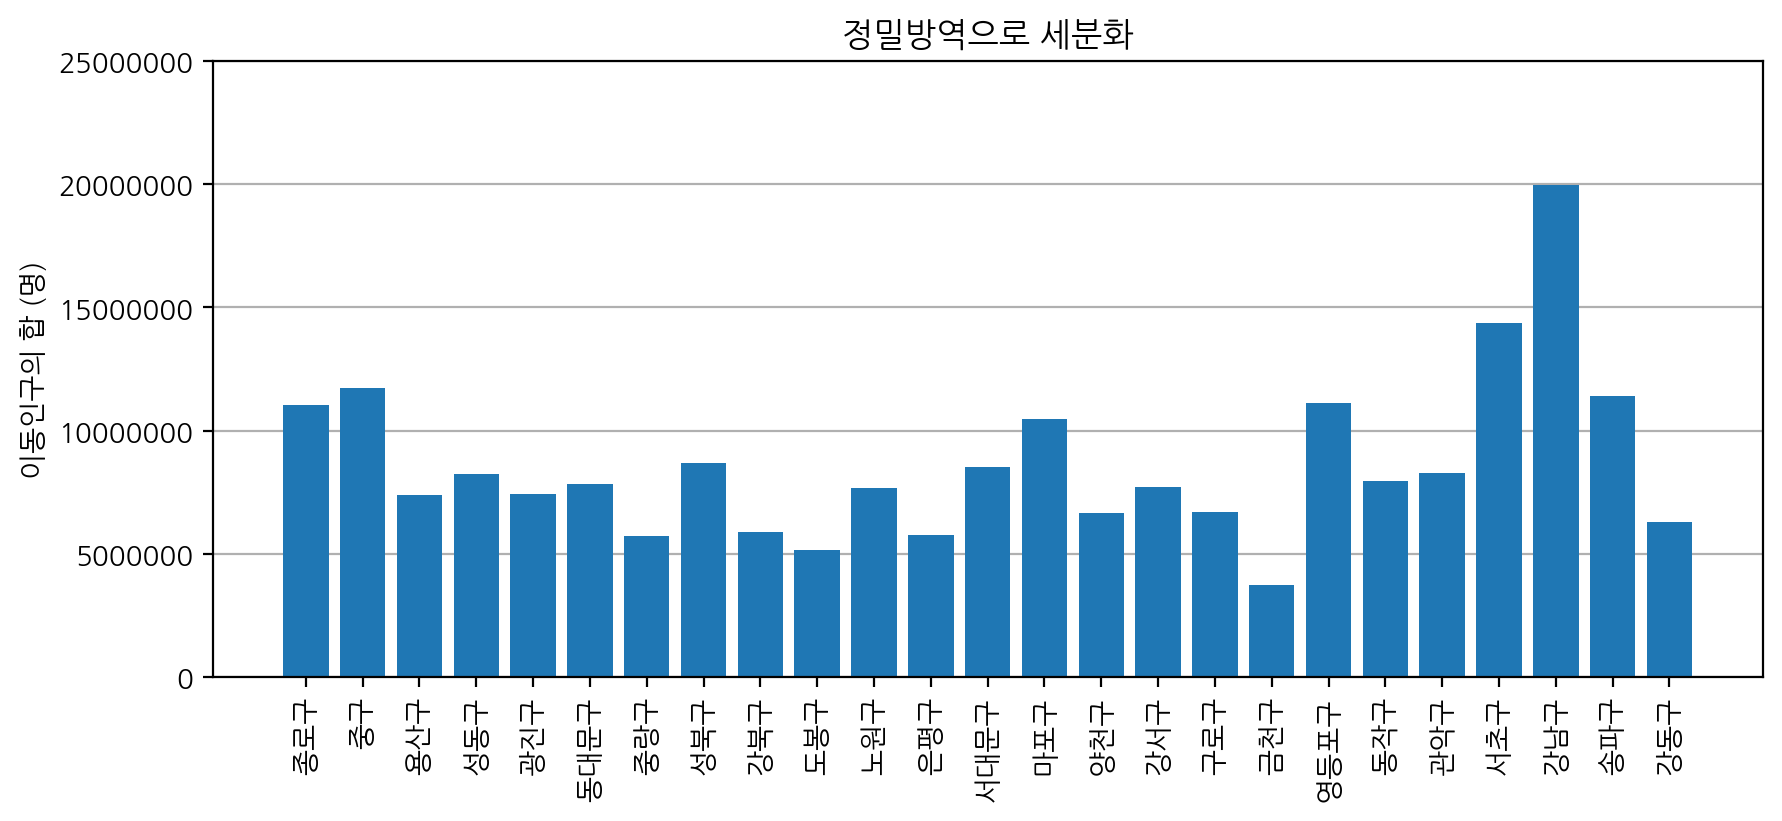

In [8]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202011/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202011/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("정밀방역으로 세분화")
ax.set_axisbelow(True)
fig.savefig('./메로나png/6. 정밀방역으로 세분화.png', bbox_inches='tight')
fig.show()

## 2020년 12월 : 2단계 시행

8416709
도착 시군구 코드
강남구     16385832.58
강동구      5339773.84
강북구      4936375.75
강서구      6442737.12
관악구      6935640.13
광진구      6145180.93
구로구      5673031.49
금천구      3297223.88
노원구      6457917.75
도봉구      4372077.63
동대문구     6605435.63
동작구      6561027.57
마포구      8282553.73
서대문구     6890866.51
서초구     11691366.90
성동구      6947152.03
성북구      7184290.22
송파구      9502706.08
양천구      5442380.94
영등포구     9375452.55
용산구      5970394.06
은평구      4886462.67
종로구      8437098.25
중구       9534587.91
중랑구      4971993.53
Name: 이동인구(합), dtype: float64


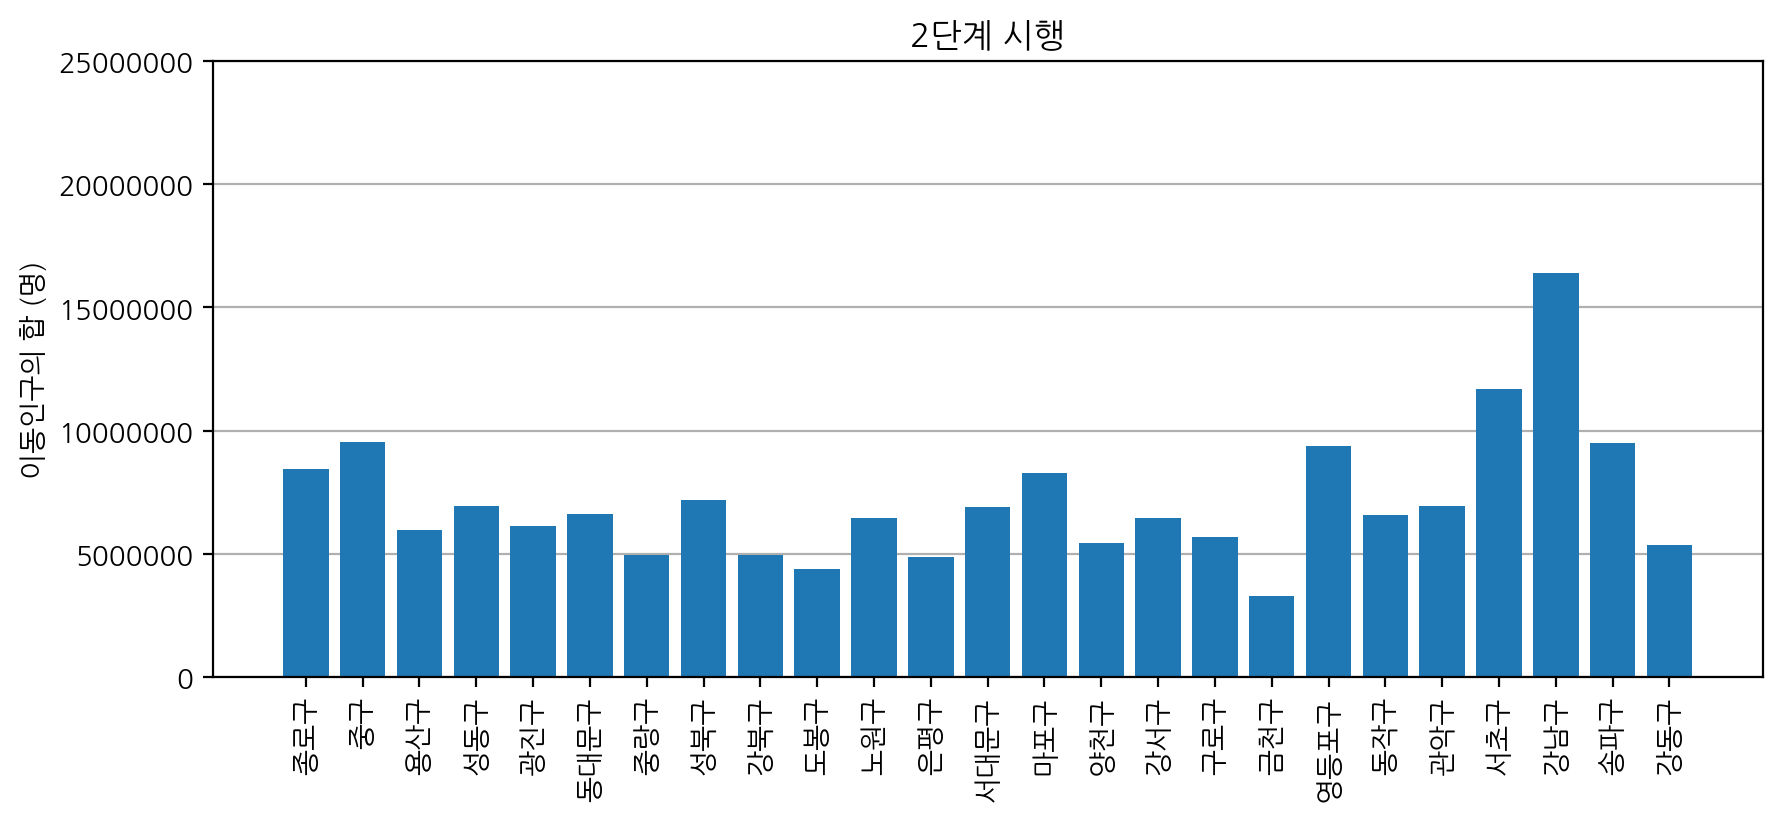

In [9]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202012/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2020/생활이동_자치구_202012/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("2단계 시행")
ax.set_axisbelow(True)
fig.savefig('./메로나png/7. 2단계 시행.png', bbox_inches='tight')
fig.show()

# 2021년

## ~~2021년 2월~~

## 2021년 7월 : 거리두기 4단계

9160139
도착 시군구 코드
강남구     19332702.23
강동구      6275323.52
강북구      5847752.20
강서구      7716598.63
관악구      8118439.63
광진구      7258653.73
구로구      6636203.04
금천구      3803297.36
노원구      7462728.54
도봉구      5126483.54
동대문구     7750090.32
동작구      7808251.59
마포구     10170646.08
서대문구     8089725.96
서초구     13773004.71
성동구      8339369.29
성북구      8427366.03
송파구     11151158.06
양천구      6577160.10
영등포구    11175473.12
용산구      7400559.63
은평구      5579402.59
종로구     10347001.62
중구      11177160.20
중랑구      5703639.05
Name: 이동인구(합), dtype: float64


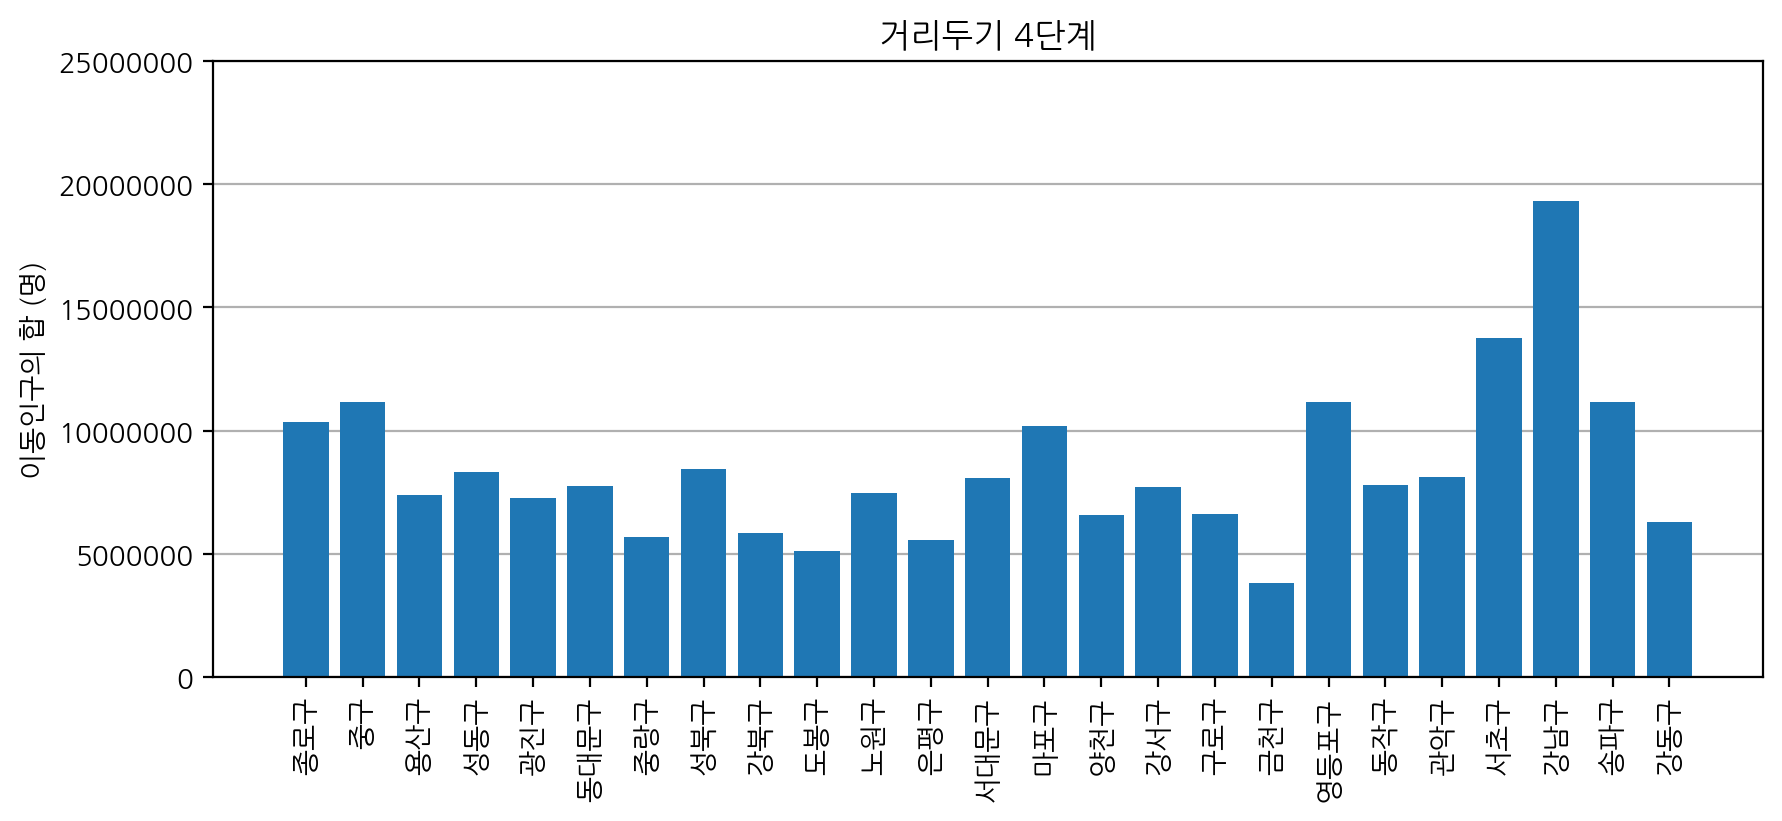

In [10]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202107/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202107/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 4단계")
ax.set_axisbelow(True)
fig.savefig('./메로나png/10. 거리두기 4단계.png', bbox_inches='tight')
fig.show()

## 2021년 8월 : 거리두기 해제

9023470
도착 시군구 코드
강남구     18821709.61
강동구      6084538.97
강북구      5685690.34
강서구      7479984.76
관악구      7848701.45
광진구      7071558.75
구로구      6354104.16
금천구      3637862.21
노원구      7242646.55
도봉구      4998622.04
동대문구     7546944.92
동작구      7600892.92
마포구     10045267.35
서대문구     7833680.09
서초구     13409280.28
성동구      8107755.88
성북구      8181384.93
송파구     10891892.37
양천구      6444280.55
영등포구    10958237.27
용산구      7280584.36
은평구      5362919.75
종로구     10034585.08
중구      10621282.00
중랑구      5510412.07
Name: 이동인구(합), dtype: float64


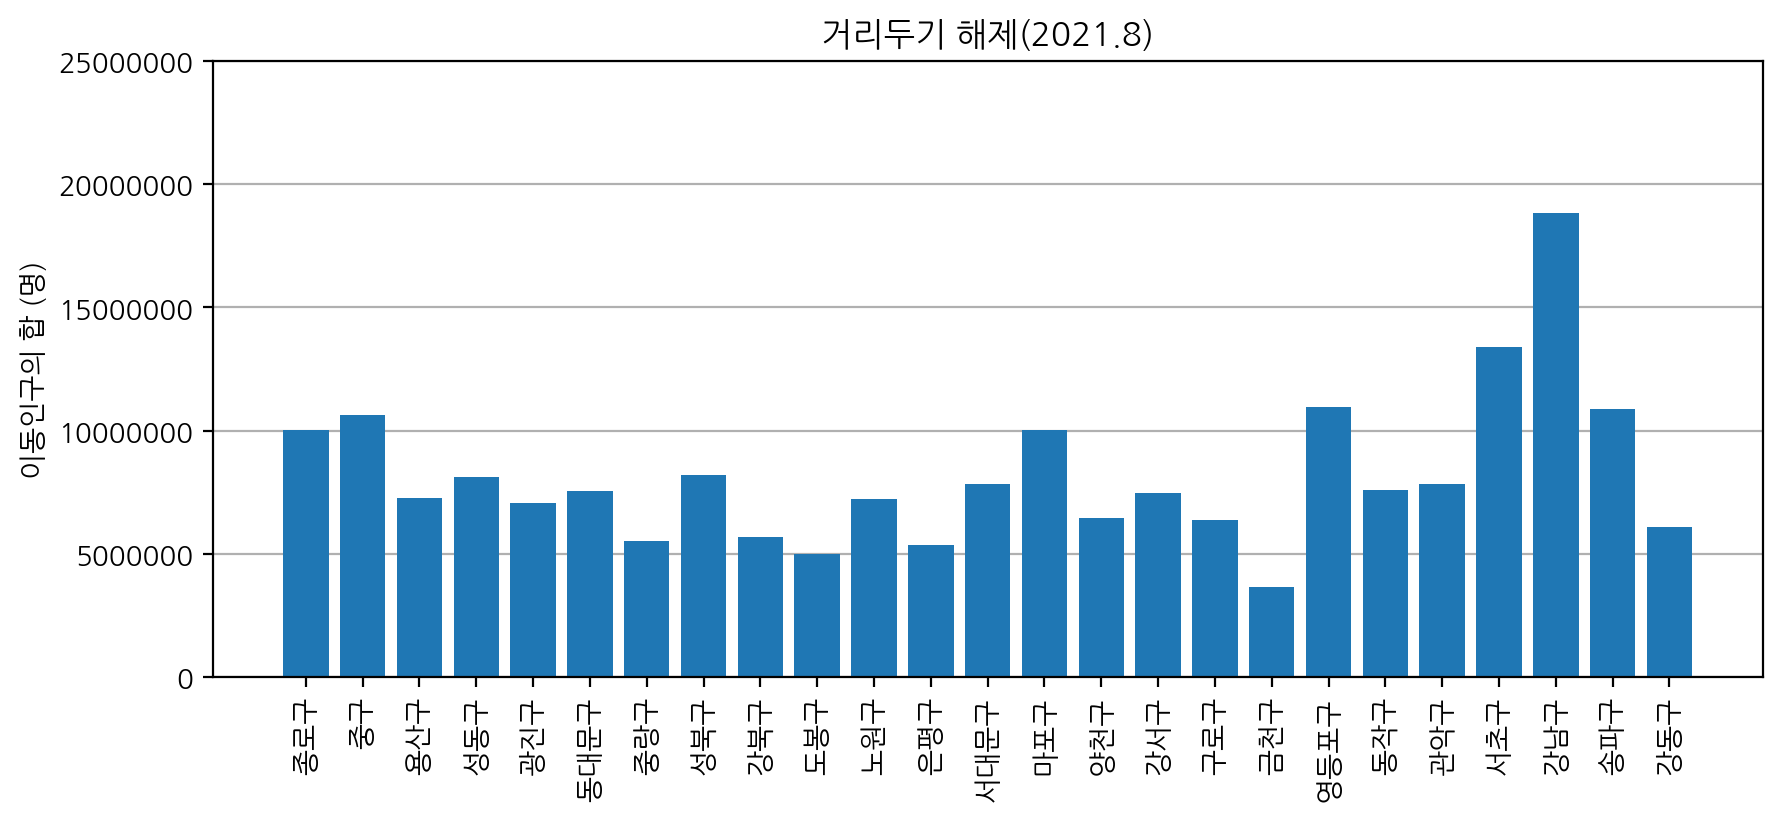

In [11]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202108/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202108/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2021.8)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(1).png', bbox_inches='tight')
fig.show()

## 2021년 9월 : 거리두기 해제

9147492
도착 시군구 코드
강남구     18596106.01
강동구      6238729.33
강북구      5920870.78
강서구      7660278.70
관악구      7977620.07
광진구      7332725.37
구로구      6480988.99
금천구      3690235.59
노원구      7510332.46
도봉구      5233712.14
동대문구     7835525.98
동작구      7880990.32
마포구     10267005.67
서대문구     8074487.18
서초구     13451139.28
성동구      8308052.06
성북구      8559803.68
송파구     11010847.82
양천구      6647550.86
영등포구    11169656.73
용산구      7468317.44
은평구      5559402.43
종로구     10466567.38
중구      11019318.75
중랑구      5676954.09
Name: 이동인구(합), dtype: float64


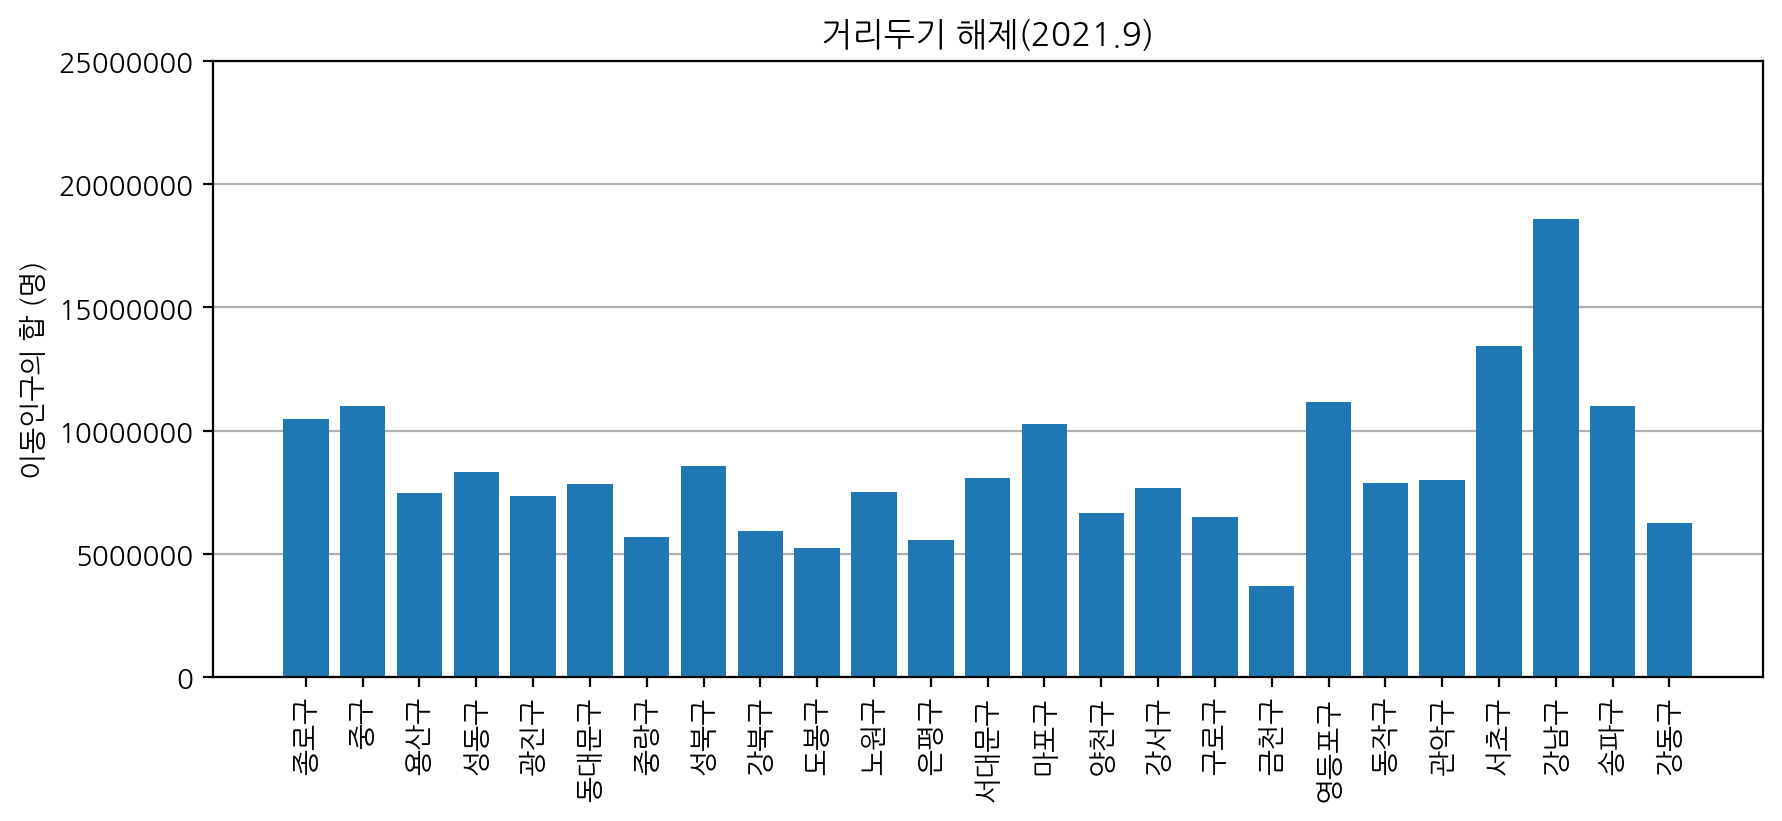

In [12]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202109/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202109/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2021.9)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(2).png', bbox_inches='tight')
fig.show()

## 2021년 10월 : 거리두기 해제

9326384
도착 시군구 코드
강남구     20327557.36
강동구      6693121.61
강북구      6230590.39
강서구      8177034.86
관악구      8594633.95
광진구      7856851.41
구로구      6949618.46
금천구      3938242.62
노원구      7930126.74
도봉구      5469865.98
동대문구     8331140.53
동작구      8431019.12
마포구     11143313.14
서대문구     8660509.16
서초구     14519322.29
성동구      8884230.70
성북구      9113517.17
송파구     11985478.37
양천구      7009453.05
영등포구    11936832.84
용산구      8130317.16
은평구      5900569.40
종로구     11544663.79
중구      12147908.96
중랑구      6012802.56
Name: 이동인구(합), dtype: float64


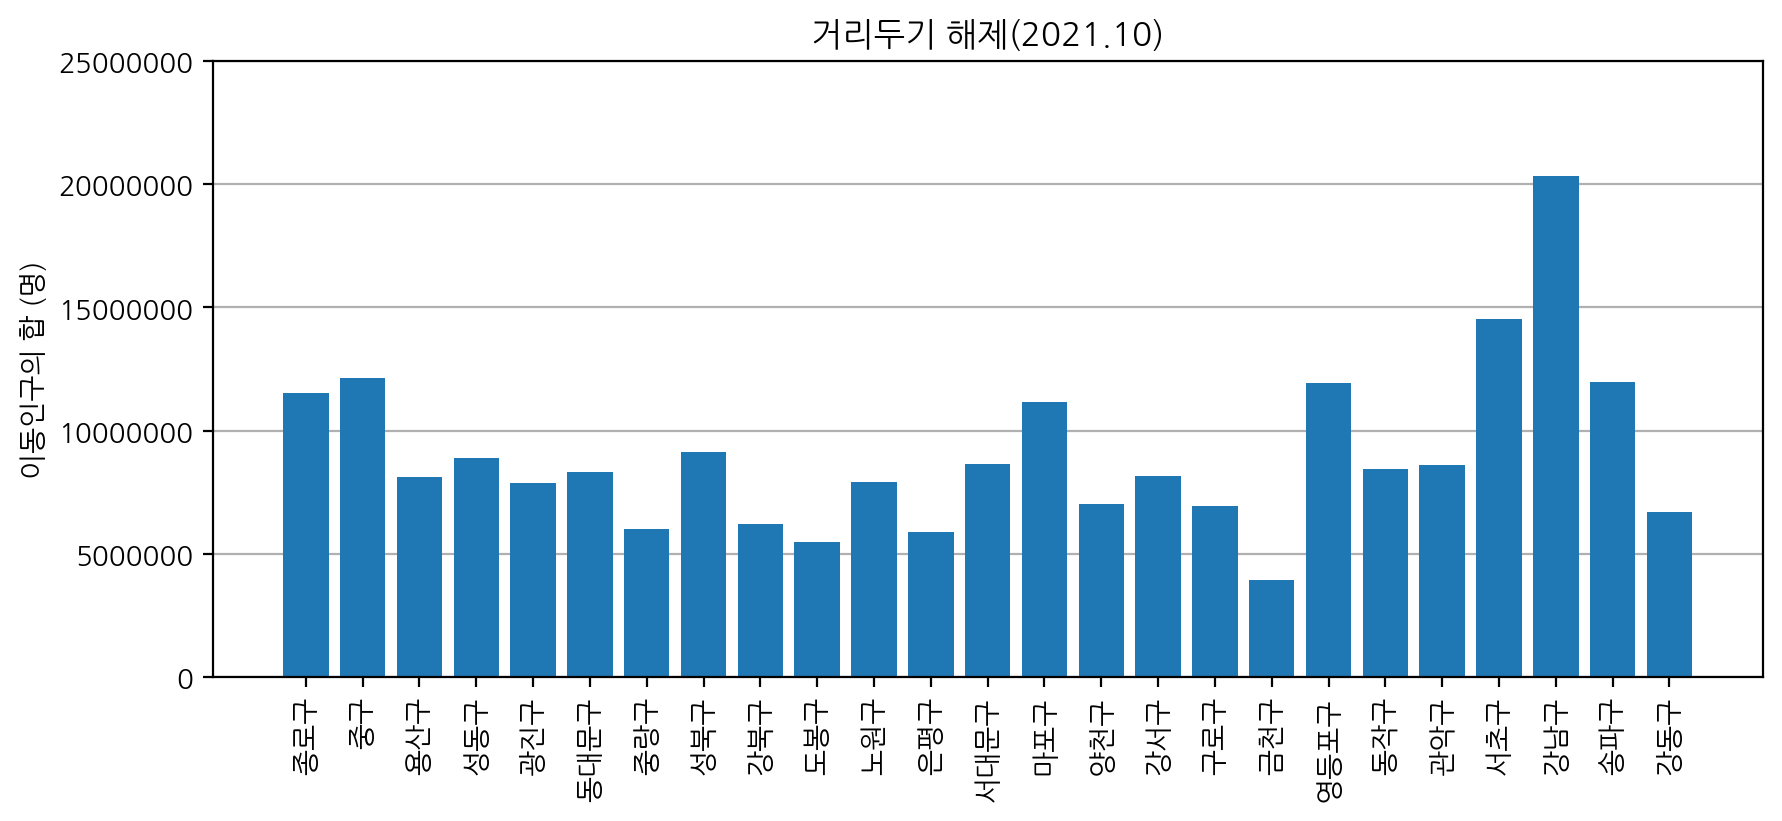

In [13]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202110/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202110/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2021.10)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(3).png', bbox_inches='tight')
fig.show()

## 2021년 11월 : 거리두기 해제

9523033
도착 시군구 코드
강남구     21617919.83
강동구      6844118.27
강북구      6285009.30
강서구      8389935.41
관악구      8831483.99
광진구      8008244.55
구로구      7190435.25
금천구      4114378.96
노원구      8092751.81
도봉구      5526995.72
동대문구     8574202.54
동작구      8551614.04
마포구     11556966.00
서대문구     9102467.75
서초구     15238418.96
성동구      9152256.72
성북구      9306453.50
송파구     12396331.44
양천구      7078270.74
영등포구    12457817.34
용산구      8357971.82
은평구      6090215.73
종로구     12168628.67
중구      12919923.64
중랑구      6090333.25
Name: 이동인구(합), dtype: float64


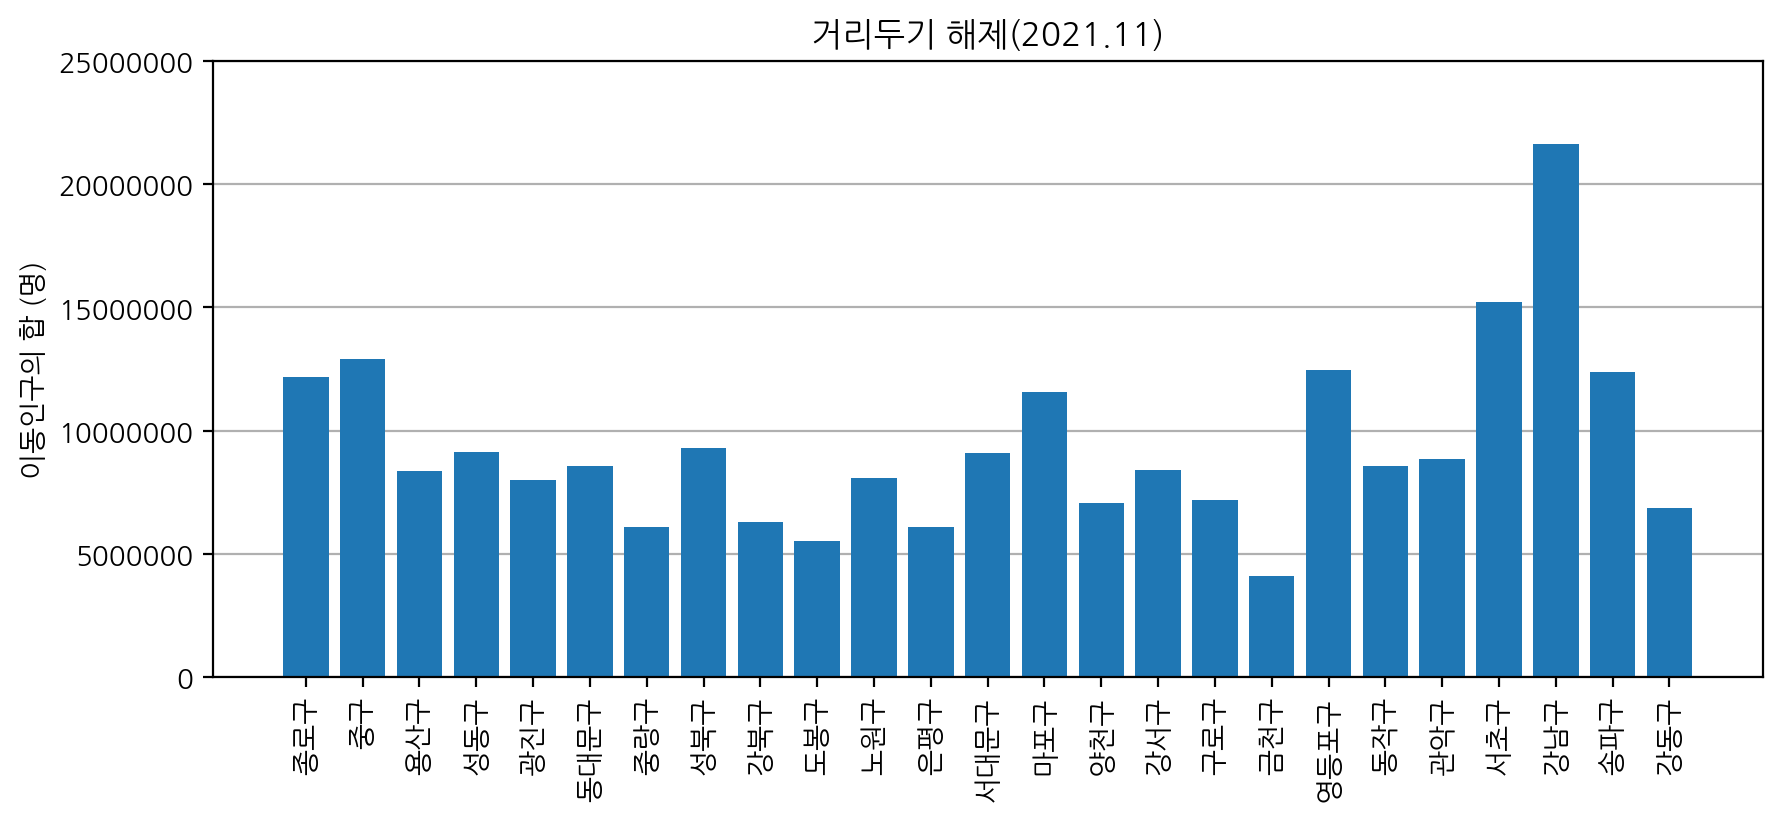

In [14]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202111/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202111/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2021.11)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(4).png', bbox_inches='tight')
fig.show()

## 2021년 12월 : 거리두기 해제

9342768
도착 시군구 코드
강남구     21298512.58
강동구      6806324.34
강북구      6218072.97
강서구      8262606.66
관악구      8741899.25
광진구      7885067.27
구로구      7164491.16
금천구      4132069.33
노원구      8035942.38
도봉구      5470301.03
동대문구     8374193.50
동작구      8417895.51
마포구     11310224.86
서대문구     8953702.47
서초구     14868561.19
성동구      9090359.29
성북구      9093584.12
송파구     12255167.66
양천구      7052322.82
영등포구    12313964.65
용산구      8196979.33
은평구      6125938.55
종로구     11496421.42
중구      12769067.39
중랑구      6111337.29
Name: 이동인구(합), dtype: float64


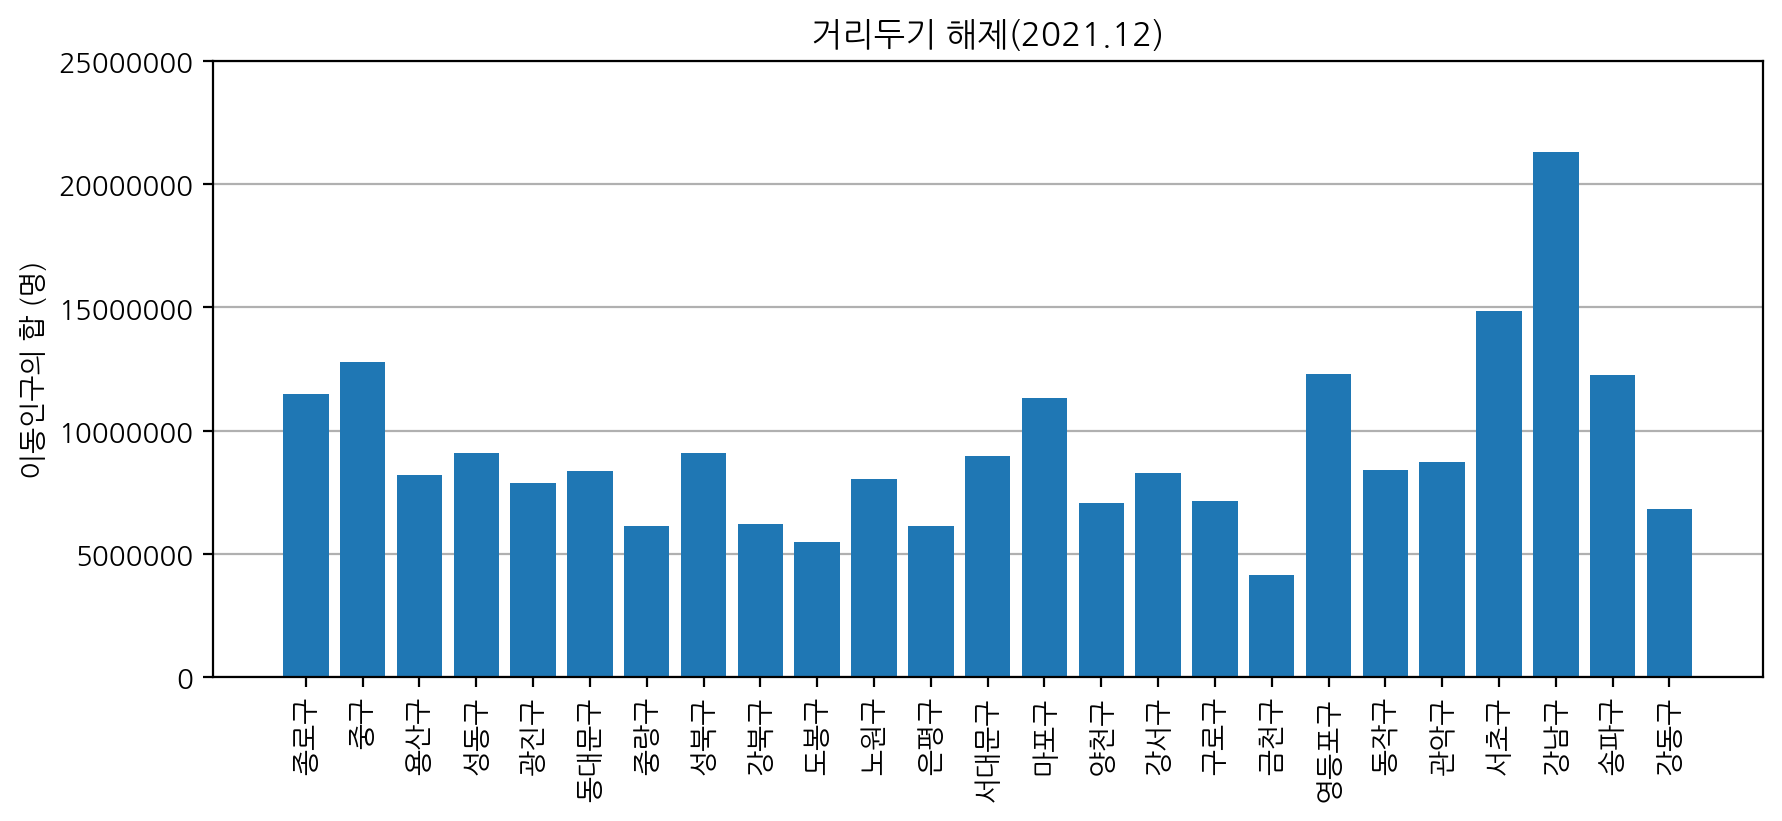

In [15]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202112/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2021/생활이동_자치구_202112/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2021.12)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(5).png', bbox_inches='tight')
fig.show()

# 2022년

## 2022년 1월 : 거리두기 해제

9056477
도착 시군구 코드
강남구     20263869.42
강동구      6479189.84
강북구      5932656.54
강서구      7923984.06
관악구      8418569.31
광진구      7562289.67
구로구      6872393.38
금천구      3934183.33
노원구      7683210.14
도봉구      5284001.57
동대문구     8094367.52
동작구      8123231.84
마포구     10688404.02
서대문구     8486114.84
서초구     14184401.62
성동구      8570587.88
성북구      8636663.53
송파구     11749913.17
양천구      6820044.46
영등포구    11862299.85
용산구      7692629.43
은평구      5872986.10
종로구     10783985.58
중구      11588329.51
중랑구      5839230.93
Name: 이동인구(합), dtype: float64


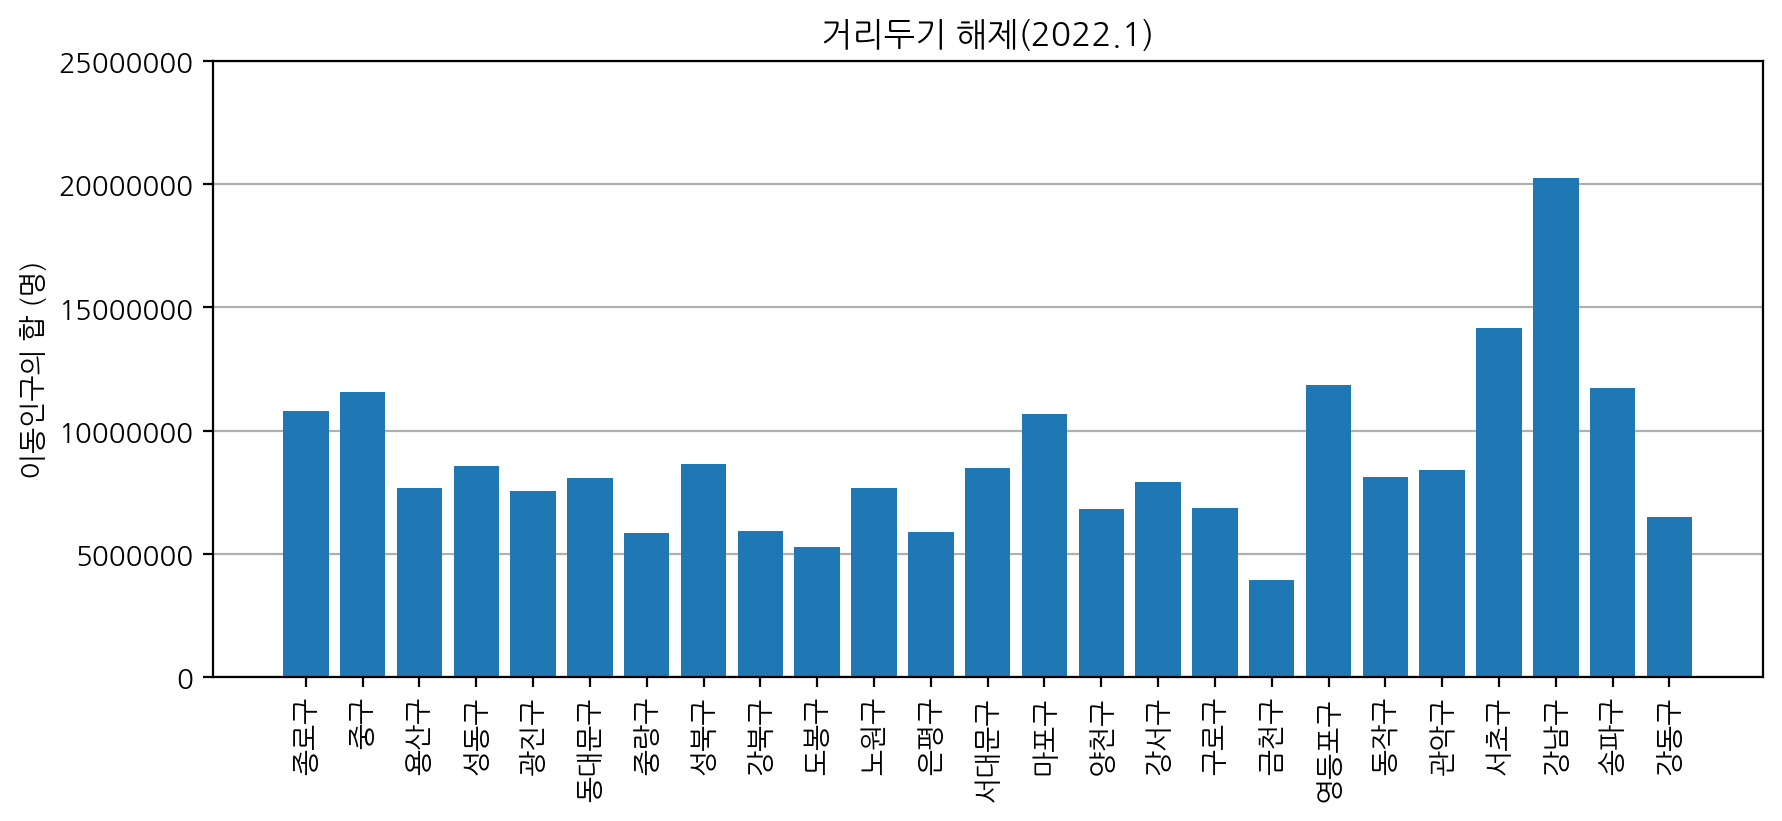

In [16]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202201/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202201/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2022.1)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(6).png', bbox_inches='tight')
fig.show()

## 2021년 2월 : 거리두기 해제

8593589
도착 시군구 코드
강남구     17262894.28
강동구      5477382.44
강북구      5097478.85
강서구      6777466.25
관악구      7257667.99
광진구      6442392.72
구로구      5823727.11
금천구      3290168.34
노원구      6526879.49
도봉구      4484218.29
동대문구     6839709.61
동작구      6886972.93
마포구      9157228.61
서대문구     7290883.47
서초구     11999973.29
성동구      7292247.80
성북구      7394510.31
송파구      9925810.88
양천구      5808668.71
영등포구    10040648.85
용산구      6511367.32
은평구      5033055.03
종로구      9191335.54
중구       9783167.67
중랑구      4997579.28
Name: 이동인구(합), dtype: float64


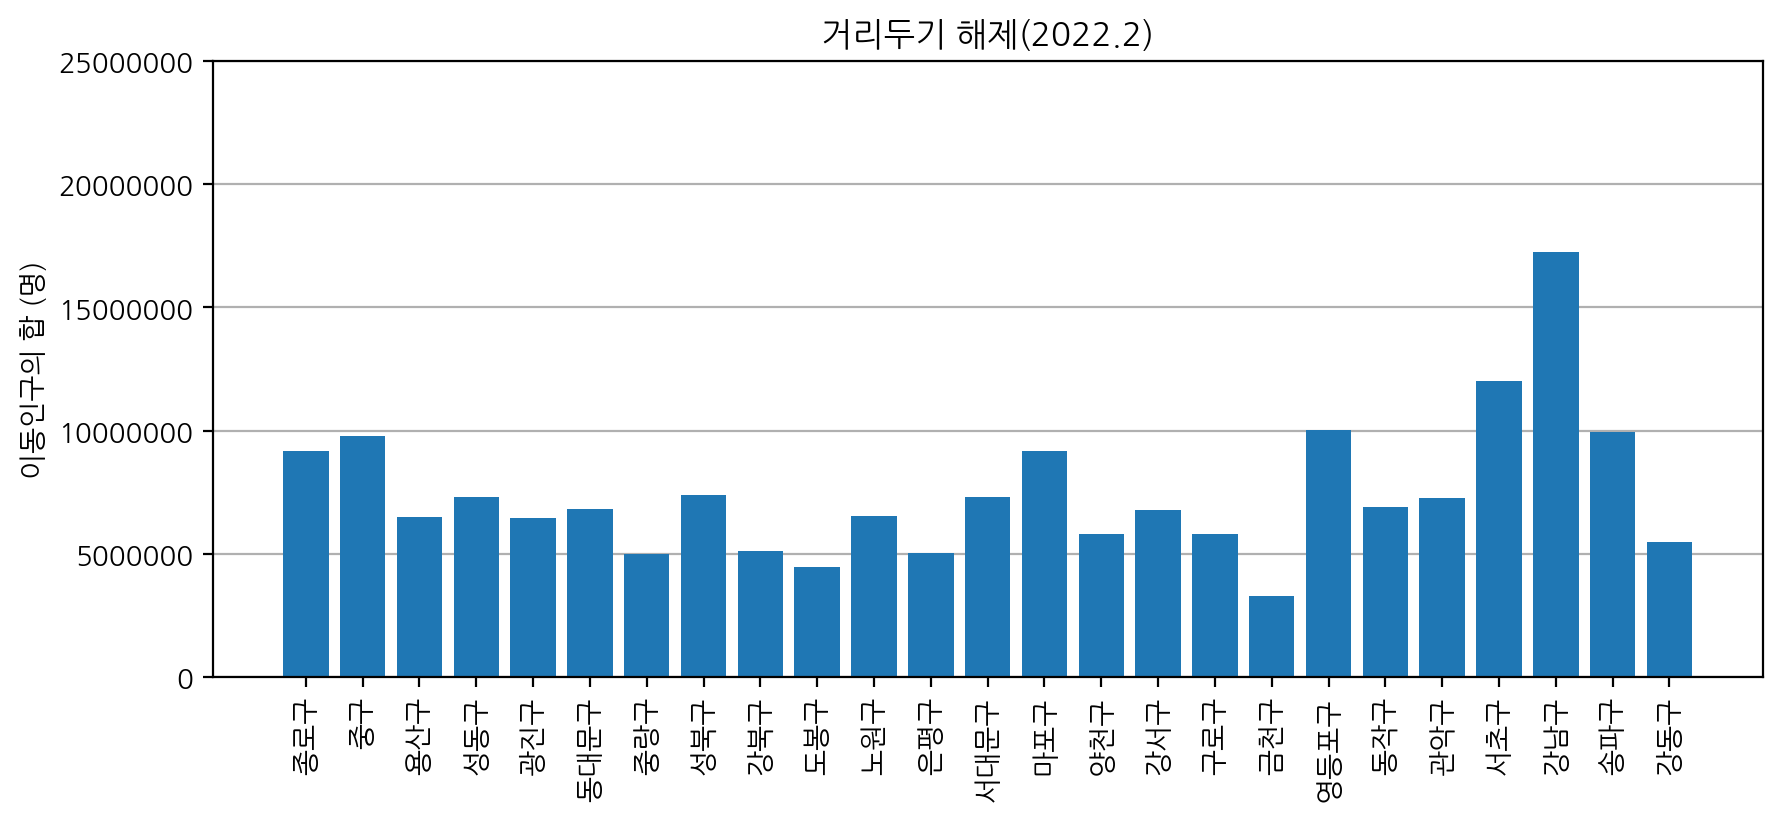

In [17]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202202/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202202/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2022.2)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(7).png', bbox_inches='tight')
fig.show()

## 2021년 3월 : 거리두기 해제

9027715
도착 시군구 코드
강남구     19220145.09
강동구      6149897.03
강북구      5737813.94
강서구      7524529.30
관악구      8195747.56
광진구      7401472.91
구로구      6472384.46
금천구      3682611.66
노원구      7413468.70
도봉구      5071583.07
동대문구     7822630.81
동작구      7797154.26
마포구     10391324.48
서대문구     8303354.19
서초구     13357005.15
성동구      8417318.96
성북구      8328729.19
송파구     11011696.12
양천구      6461483.89
영등포구    11197205.10
용산구      7324426.92
은평구      5665484.66
종로구     10518955.90
중구      11175523.62
중랑구      5647024.68
Name: 이동인구(합), dtype: float64


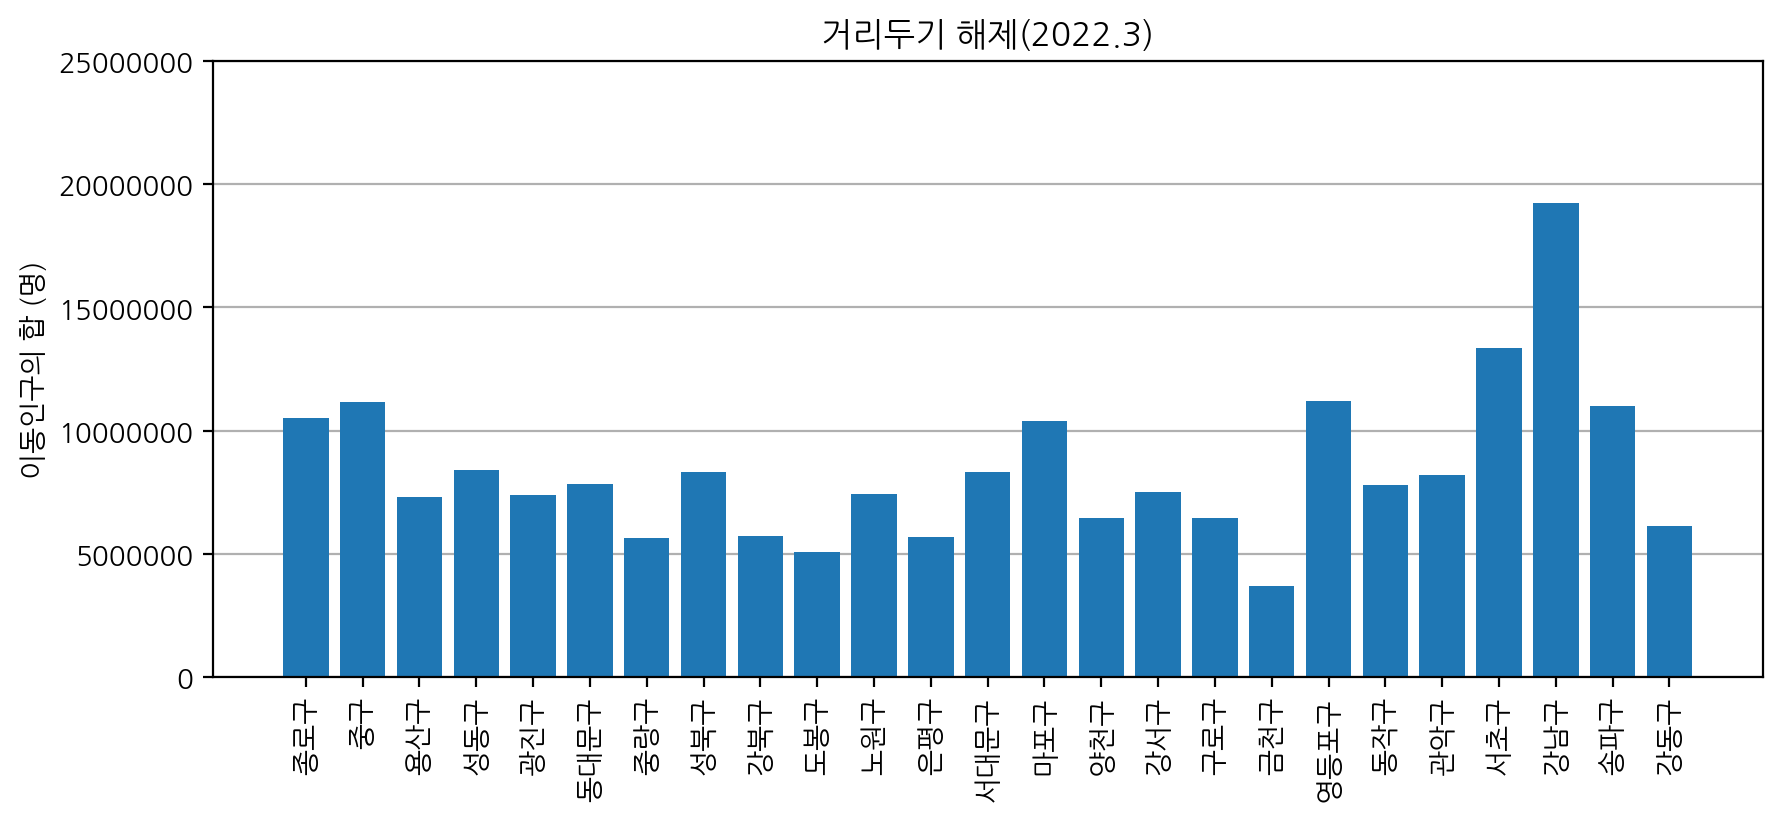

In [18]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202203/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202203/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0,25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2022.3)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(8).png', bbox_inches='tight')
fig.show()

## 2021년 4월 : 거리두기 해제

9547591
도착 시군구 코드
강남구     21454022.14
강동구      6940247.01
강북구      6475146.53
강서구      8397819.23
관악구      9177223.38
광진구      8506071.77
구로구      7269488.11
금천구      4097273.02
노원구      8303833.40
도봉구      5660299.43
동대문구     8867335.46
동작구      8901763.75
마포구     11929979.72
서대문구     9444367.15
서초구     15278440.44
성동구      9563524.75
성북구      9641445.00
송파구     12796901.32
양천구      7231522.15
영등포구    13095461.33
용산구      8517801.99
은평구      6291714.73
종로구     12412234.68
중구      13000058.11
중랑구      6296517.64
Name: 이동인구(합), dtype: float64


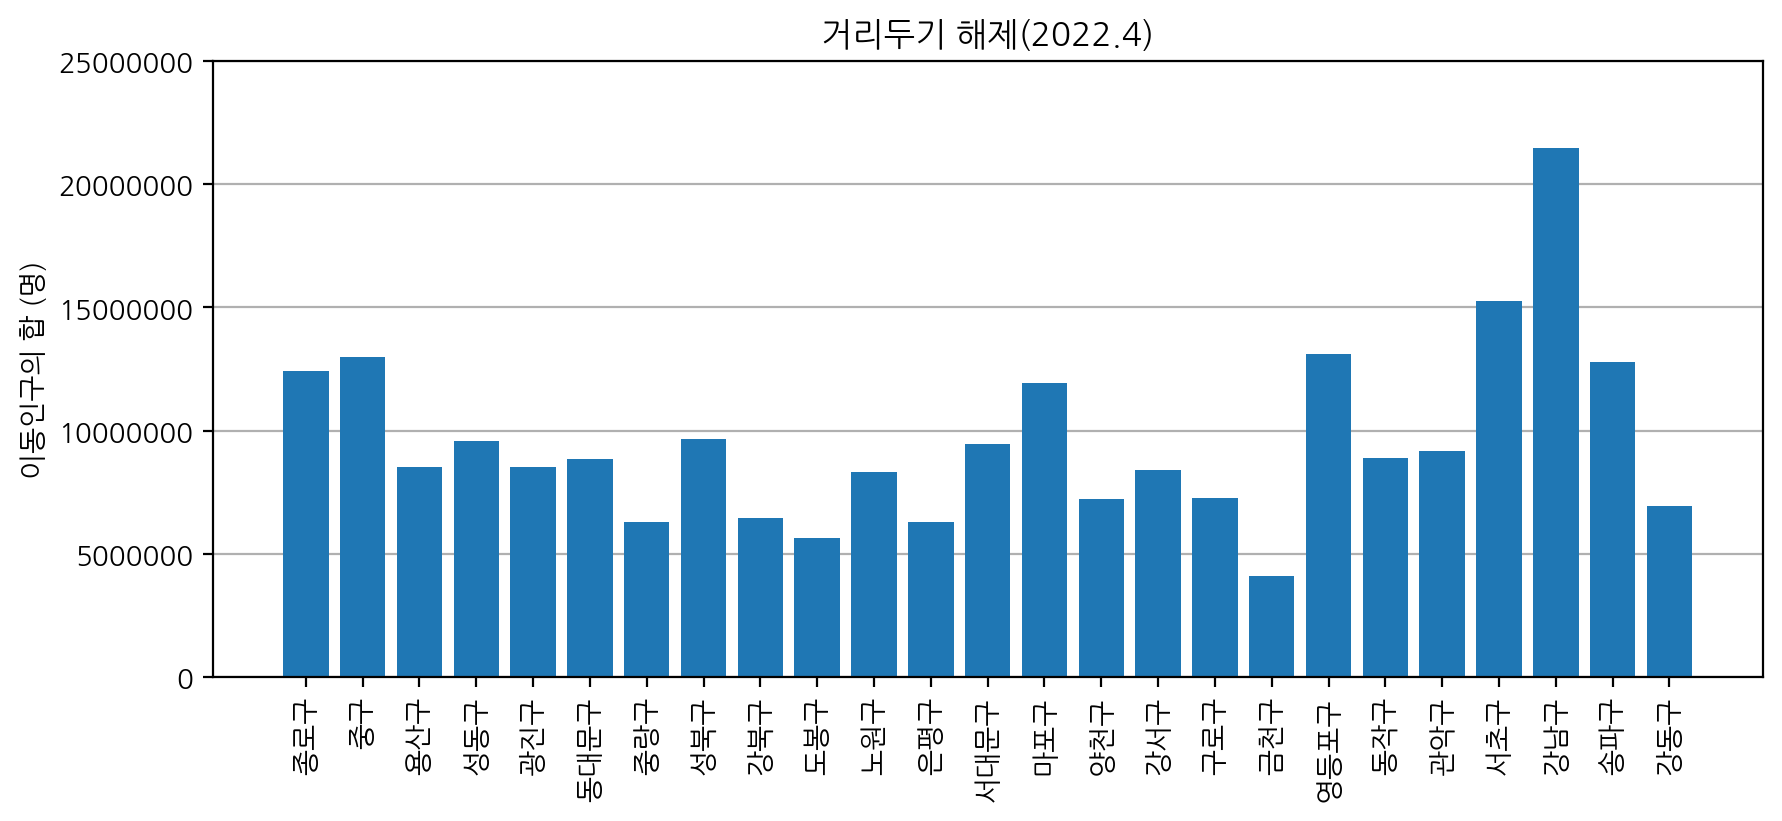

In [19]:
from os import listdir
import pandas as pd

filenames = [
    "../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202204/" + f
    for f in listdir("../참고 데이터/csv/large-datasets/2022/생활이동_자치구_202204/")
]

# data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames0] + [pd.read_csv(f, encoding='cp949') for f in filenames1],
#                 ignore_index=True)
data = pd.concat([pd.read_csv(f, encoding='cp949') for f in filenames],
                 ignore_index=True)

data = data.drop(data[data['출발 시군구 코드'] == data['도착 시군구 코드']].index)
data['이동인구(합)'] = data['이동인구(합)'].replace(to_replace="*", value=0)
data['이동인구(합)'] = data['이동인구(합)'].astype(float)

tst = {key: value for key, value in zip(data1['중분류'], data1['시군구'])}

data = data.drop(data[data['출발 시군구 코드'].astype(int) > 11250].index)
data = data.drop(data[data['도착 시군구 코드'].astype(int) > 11250].index)
data = data.replace(tst)

print(data['이동인구(합)'].size)
# data2 = data.groupby(['출발 시군구 코드', '도착 시군구 코드'
#                       ])['평균 이동 시간(분)'].sum() #.head(10)
# data2point5 = data.groupby(['도착 시군구 코드'])['평균 이동 시간(분)'].sum()  #.head(10)
data2point5 = data.groupby(['도착 시군구 코드'])['이동인구(합)'].sum()
print(data2point5)

# data3 = data.loc[:, ["도착 시군구 코드","평균 이동 시간(분)"]]

d = data2point5
x = [
    '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구', '도봉구',
    '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구', '영등포구', '동작구',
    '관악구', '서초구', '강남구', '송파구', '강동구'
]
y = [
    d.종로구, d.중구, d.용산구, d.성동구, d.광진구, d.동대문구, d.중랑구, d.성북구, d.강북구, d.도봉구,
    d.노원구, d.은평구, d.서대문구, d.마포구, d.양천구, d.강서구, d.구로구, d.금천구, d.영등포구, d.동작구,
    d.관악구, d.서초구, d.강남구, d.송파구, d.강동구
]
# 악 더러워

fig, ax = plt.subplots()
fig.set_size_inches(10, 4)
ax.grid(axis='y')
ax.bar(x, y)
ax.set_ylim(0, 25000000)
ax.set_xticks(range(25), x, rotation=90)
ax.set_ylabel("이동인구의 합 (명)")
ax.ticklabel_format(style='plain', axis='y')
ax.set_title("거리두기 해제(2022.4)")
ax.set_axisbelow(True)
fig.savefig('./메로나png/11. 거리두기 해제(9).png', bbox_inches='tight')
fig.show()